<a href="https://colab.research.google.com/github/danielkersting/Portfolio-de-Projetos-de-Data-Science/blob/Projeto-AirBNB/Projeto_Airbnb_HONG_KONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**ANALISE DE DADOS DO AIRBNB - HONG KONG:** 

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

#**Introdução**


Em diversos estudos já realizados na área de análise e ciẽncia de dados, os dados provenientes da AIRBNB são famosos. A AIRBNB ("Air - Bed - 'n Breakfast) é a empresa é a maior rede hoteleira do mundo, com base em todos os continentes, centraliza o serviço de locação, levando os interessados em uma hospedagem aos interessados em alugar os seus imóveis, sem ser dona de imóvel algum. Neste estudo serão utilizados dados com data de 23 de dezembro de 2022, podendo ocorrer diferenças com a atualização dos dados pela própria AIRBNB.

No próprio endereço da AIRBNB, referente a cidade de Hong Kong (https://http://insideairbnb.com/hong-kong) já são apresentados alguns dados preliminares interessantes:
* 93% dos imóveis disponíveis, ou são imóveis inteiros (40.2%), ou quartos privativos (52,8%);
* Apenas 1.6% dos imóveis são quartos de hotel; e
* Três localidades concentram mais de 20% de todos os imóveis disponíveis na cidade (Central & Western, Kowloon City, e Eastern).


# **Visão Geral e Análise de Dados**

Este estudo, a partir dos dados disponibilizados, irá verificar inicialmente a qualidade dos dados, realizando posteriormente a limpeza da base de dados, com a retirada de valores ausentes, e verificação de outliers distorcendo as informações disponíveis. Serão realizadas questionamentos específicos, de forma a extrair informações da base de dados, e trazer o insights necessários para a avaliação:
* Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
* Q2. Qual a porcentagem de valores ausentes no dataset?
* Q3. Qual o tipo de distribuição das variáveis?
* Q4. Qual a média dos preços de aluguel? A informação é coerente?
* Q5. Qual a correlação existente entre as variáveis?
* Q6. Qual o tipo de imóvel mais alugado no Airbnb?
* Q7. Qual a localidade mais cara do dataset?
* Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?


*Dicionário das variáveis*

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* number_of_reviews_ltm - número de avaliações que a propriedade tem (nos últimos 12 meses).
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias




Para o início da análise de dados, serão importados os pacotes necessários:

In [3]:
!pip install pywaffle -q
!pip install plotly==5.1.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

from pywaffle import Waffle
import plotly.express as px


Após a importação dos pacotes, segue importação dos dados necessários:

In [5]:
df = pd.read_csv('http://data.insideairbnb.com/china/hk/hong-kong/2022-12-23/visualisations/listings.csv', index_col=0)

# **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

No início do estudo de um dataset, a primeira verificação trata-se de como estão compostos os dados. A partir desta etapa é possível ter uma noção do tamanho, e de quais próximas ações são necessárias.

Verificando as dimensões:

In [6]:
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  17 
Entradas:  5194


Verificando as primeiras entradas:

In [7]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
17891,Large Light Filled Loft,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,1400,60,73,2017-11-29,0.47,1,0,0,NaN
72571,SoHo off Hollywood Road 3A,304876,Brend,NaN,Central & Western,22.28463,114.15054,Entire home/apt,577,2,151,2022-03-11,1.05,10,266,1,NaN
2998876,Double Room with Balcony,14626463,Wendy,NaN,Yau Tsim Mong,22.29659,114.17192,Private room,671,1,0,NaN,NaN,4,365,0,NaN
103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28418,114.15431,Entire home/apt,1317,3,285,2022-10-15,2.03,10,343,9,NaN
104626,Entire Flat - Next to Man Mo Temple,544166,Celine,NaN,Central & Western,22.28360,114.14790,Entire home/apt,2317,1,14,2012-02-06,0.10,1,365,0,NaN


Verificando os tipos:

In [8]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Verificando os dados:

In [9]:
df.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,5.194000e+03,0.0,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,2543.000000,5194.000000,5194.000000,5194.000000,0.0
mean,9.952708e+07,NaN,22.296253,114.161216,1658.039469,20.798806,17.336350,0.722375,105.182133,234.789372,1.704274,NaN
std,1.150949e+08,NaN,0.034002,0.049359,16447.830965,38.388968,48.518386,1.030108,144.708172,145.025940,6.909274,NaN
min,6.303800e+04,NaN,22.191250,113.856340,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.292221e+07,NaN,22.280300,114.153690,185.250000,1.000000,0.000000,0.100000,3.000000,87.000000,0.000000,NaN
50%,5.886233e+07,NaN,22.291910,114.171260,450.000000,20.000000,0.000000,0.340000,18.000000,324.000000,0.000000,NaN
75%,1.386492e+08,NaN,22.310880,114.180460,850.000000,29.000000,8.000000,0.960000,255.000000,364.000000,1.000000,NaN
max,4.915102e+08,NaN,22.528410,114.362470,500520.000000,1125.000000,1005.000000,11.440000,383.000000,365.000000,119.000000,NaN


# **Q2. Qual a porcentagem de valores ausentes no dataset?**

Com as respostas obtidas em Q1, é possível fazer as primeiras observações, e atuar limpando o dataset para melhores resultados.

Verificando os dados ausentes:

In [10]:
df.isnull().sum().sort_values(ascending=False)

license                           5194
neighbourhood_group               5194
reviews_per_month                 2651
last_review                       2651
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
name                                 0
host_id                              0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
price                                0
dtype: int64

Dentre a maior quantidade de dados ausentes, temos as colunas "license", "neighbourhood_group", "reviews_per_month", e "last_review". A retirada das colunas irá reduzir a quantidade de variáveis, sem influenciar o dataset.  

Excluindo colunas com os dados ausentes:

In [11]:
df.drop(columns=['reviews_per_month', 'last_review', 'license', 'neighbourhood_group'], inplace=True)


Excluindo linhas com dados ausentes:

In [12]:
df.dropna(axis=0, inplace=True)

Verificando os dados após a exclusão:

In [13]:
(df.isnull().sum()).sort_values(ascending=False)

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Conferindo condição após as exclusões:

In [14]:
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  13 
Entradas:  5194


In [15]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

 # **Q3. Qual o tipo de distribuição das variáveis?**

Para observar de maneira mais clara a distribuição das variáveis, o uso de ferramentas visuais, como gráficos, é uma alternativa muito boa. Dentre os tipos de gráficos que podem ser empregados, o que oferece uma boa quantidade de informações de maneira compacta é o gráfico do tipo histograma.


O histograma é um gráfico de barras que demonstra uma distribuição de frequências, onde a base de cada uma das barras representa uma classe, e a altura a quantidade ou frequência absoluta com que o valor da classe ocorre. Ele tem como objetivo ilustrar como uma determinada amostra de dados ou população está distribuída, dispondo as informações de modo a facilitar a visualização da distribuição dos dados.


Verificando a distribuição estatística:

In [16]:
df.describe().round(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0
mean,99527082.8,22.3,114.2,1658.0,20.8,17.3,105.2,234.8,1.7
std,115094918.9,0.0,0.0,16447.8,38.4,48.5,144.7,145.0,6.9
min,63038.0,22.2,113.9,0.0,1.0,0.0,1.0,0.0,0.0
25%,12922210.8,22.3,114.2,185.2,1.0,0.0,3.0,87.0,0.0
50%,58862332.0,22.3,114.2,450.0,20.0,0.0,18.0,324.0,0.0
75%,138649185.0,22.3,114.2,850.0,29.0,8.0,255.0,364.0,1.0
max,491510217.0,22.5,114.4,500520.0,1125.0,1005.0,383.0,365.0,119.0


Verificando as distribuições:

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

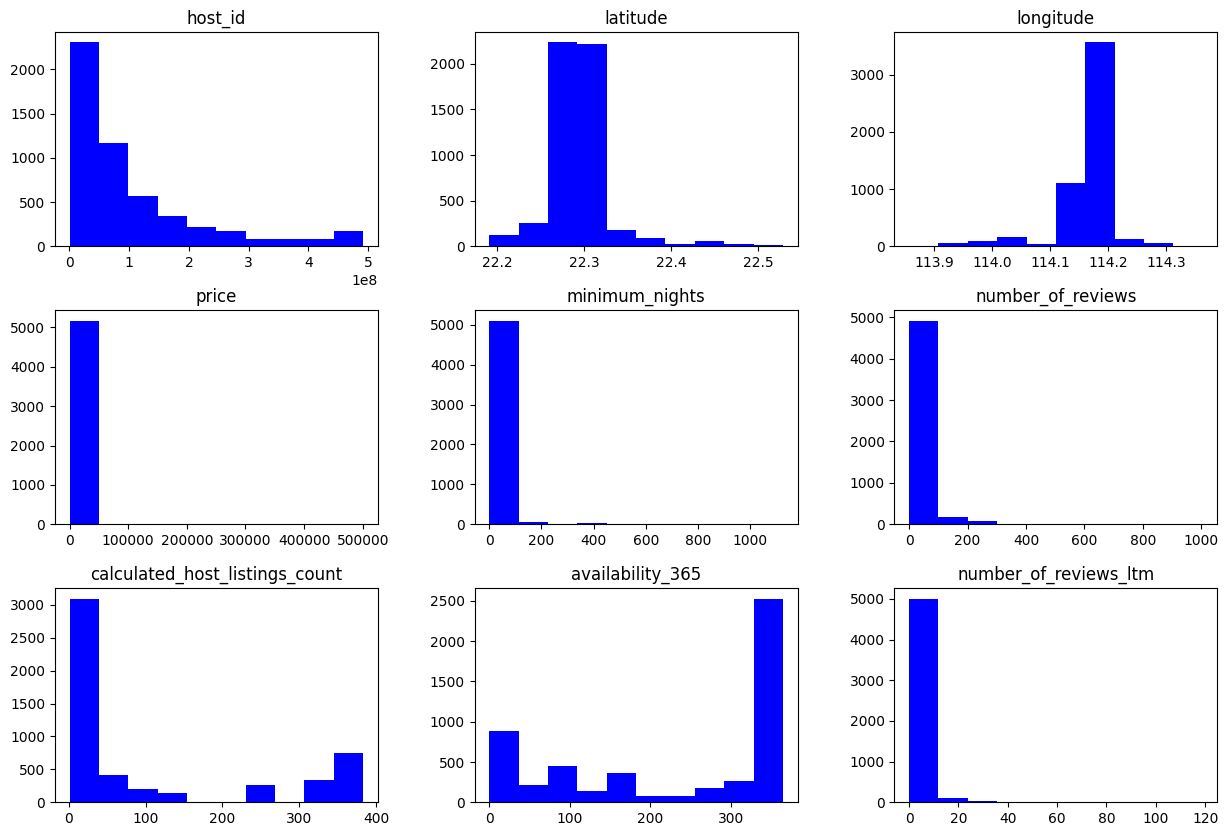

In [17]:
df.hist(figsize=(15,10),grid=False, color='blue')

# **Q4. Qual a média dos preços de aluguel? A informação é coerente?**

Os preços do aluguel para o dataset são representados pela variável "price". Observando-se o histograma obtido para a variável,é possível perceber:

> 1. A variável tem o mínimo em 0. Isso quer dizer que existem dados provavelmente preenchidos de maneira equivocada;
> 2. Na distribuição das variáveis, no item Q3 deste estudo, foi possível ver o que 75% dos dados está em 850 dólares para a esta variável, e no gráfico o valor máximo está na ordem de 500000 dólares. Existem outliers aqui; e
> 3. Outra informação importante é com relação a média e o desvio padrão. Devido a existência de outliers no dataset, o valor de ambos está distorcido em relação aos valores de mediana (50% dos dados).

Os outliers são dados que se diferenciam drasticamente de todos os outros. Outlier é um valor que foge da normalidade e que pode causar anomalias nos resultados obtidos. Uma das melhores formas de identificar dados outliers é utilizando gráficos. Ao plotar um gráfico consegue-se claramente perceber que existe algo diferente.

Em face os dados obtidos até aqui, a presença de outliers torna as informações distorcidas, sendo necessário atuar no dataset para que as informações torne-se mais coerentes.

Identificando os outliers para a variável "price":





In [18]:
q1_price=df.price.quantile(0.25)
q3_price=df.price.quantile(0.75)
IQR_price=q3_price-q1_price
print('IQR da variável price:', IQR_price)


IQR da variável price: 664.75


Definindo os limites para variável "price":

In [49]:
sup_price=q3_price+1.5*IQR_price
inf_price=q1_price-1.5*IQR_price
print('limite inferior de "price":', inf_price) 
print('limite superior de "price":', sup_price)


limite inferior de "price": -811.875
limite superior de "price": 1847.125


Verificando o conjunto de dados original para a variável "price":

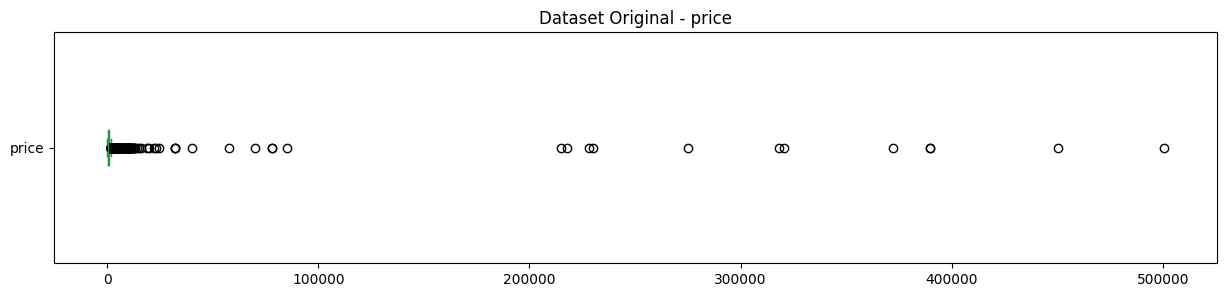

O dataset possui 5194 colunas
457 Entradas acima de 1847.125
Representam 8.80% do dataset


In [48]:
fig,ax=plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 1847.125".format(len(df[df.price>1847.125])))
print("Representam {:.2f}% do dataset".format((len(df[df.price>1847.125])/df.shape[0])*100))

Com a verificação apresentada acima, quase 9% dos dados para a variável "price" contribuem para a distorção dos valores no dataset. Com esta informação em mãos, agora se faz necessária a limpeza do dataset, retirando os outliers presentes.

Limpando o dataset:

In [21]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>1815.125].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price==0.0].index, axis=0 , inplace=True)
print('Shape antes da limpeza:', df.shape)
print('Shape após a limpeza:', df_clean.shape)


Shape antes da limpeza: (5194, 13)
Shape após a limpeza: (4728, 13)


Com o dataset limpo para a variável "price", agora se faz necessário plotar novamente o boxplot e observar a alteração obtida:


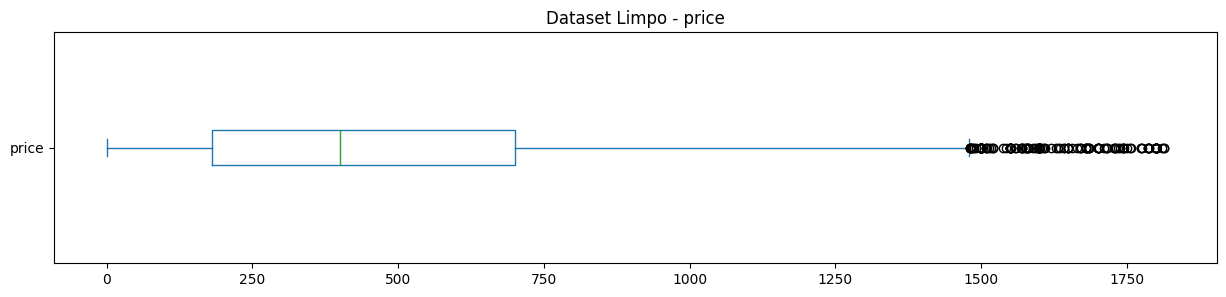

Tamanho Original:5194 colunas
Tamanho Limpo:4728 colunas


In [22]:
fig,ax=plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho Original:{} colunas".format(df.shape[0]))
print("Tamanho Limpo:{} colunas".format(df_clean.shape[0]))


Com a alteração para a variável "price" pode-se verificar as mudanças na distribuição estatística dos dados limpos:

In [23]:
df_clean.describe().round(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4728.0,4728.0,4728.0,4728.0,4728.0,4728.0,4728.0,4728.0,4728.0
mean,94550390.5,22.3,114.2,517.2,22.0,17.2,114.2,237.5,1.5
std,110983910.0,0.0,0.0,386.4,39.4,48.9,148.3,144.7,6.2
min,63038.0,22.2,113.9,1.0,1.0,0.0,1.0,0.0,0.0
25%,10625315.0,22.3,114.2,180.0,1.0,0.0,3.0,88.0,0.0
50%,56570136.0,22.3,114.2,400.0,28.0,0.0,23.0,326.0,0.0
75%,130857174.0,22.3,114.2,700.0,29.0,7.0,255.0,364.0,0.0
max,491510217.0,22.5,114.4,1814.0,1125.0,1005.0,383.0,365.0,119.0


E abaixo, os dados originais de distribuição estatística:

In [24]:
df.describe().round(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0
mean,99527082.8,22.3,114.2,1658.0,20.8,17.3,105.2,234.8,1.7
std,115094918.9,0.0,0.0,16447.8,38.4,48.5,144.7,145.0,6.9
min,63038.0,22.2,113.9,0.0,1.0,0.0,1.0,0.0,0.0
25%,12922210.8,22.3,114.2,185.2,1.0,0.0,3.0,87.0,0.0
50%,58862332.0,22.3,114.2,450.0,20.0,0.0,18.0,324.0,0.0
75%,138649185.0,22.3,114.2,850.0,29.0,8.0,255.0,364.0,1.0
max,491510217.0,22.5,114.4,500520.0,1125.0,1005.0,383.0,365.0,119.0


Resumidamente, para a variável "price" temos:

**Antes:**
média=1658,0 / desvio padrão=16447,8 / mediana=450,0 / máximo=500520,0

**Depois:**
média=517,2 / desvio padrão=386,4 / mediana=400,00 / máximo=1814,0

Com a alteração realizada, é possível notar nas informações antes versus depois que a média e mediana ficaram com valores mais próximos, assim como o desvio padrão tornou-se menor, indicando que os dados agora estão de fato mais concentrados, podendo assim refletir uma análise de melhor qualidade.

Outro fator que indica que a retirada de outliers contribuiu sem afetar de maneira drástica o dataset pode ser notado na mudança ocorrida para as demais variáveis. As mudanças refletiram em alterações estatísticas pouco relevantes para as demais variáveis.

Abaixo seguem os gráficos de histograma obtidos a partir dos dataset limpo:

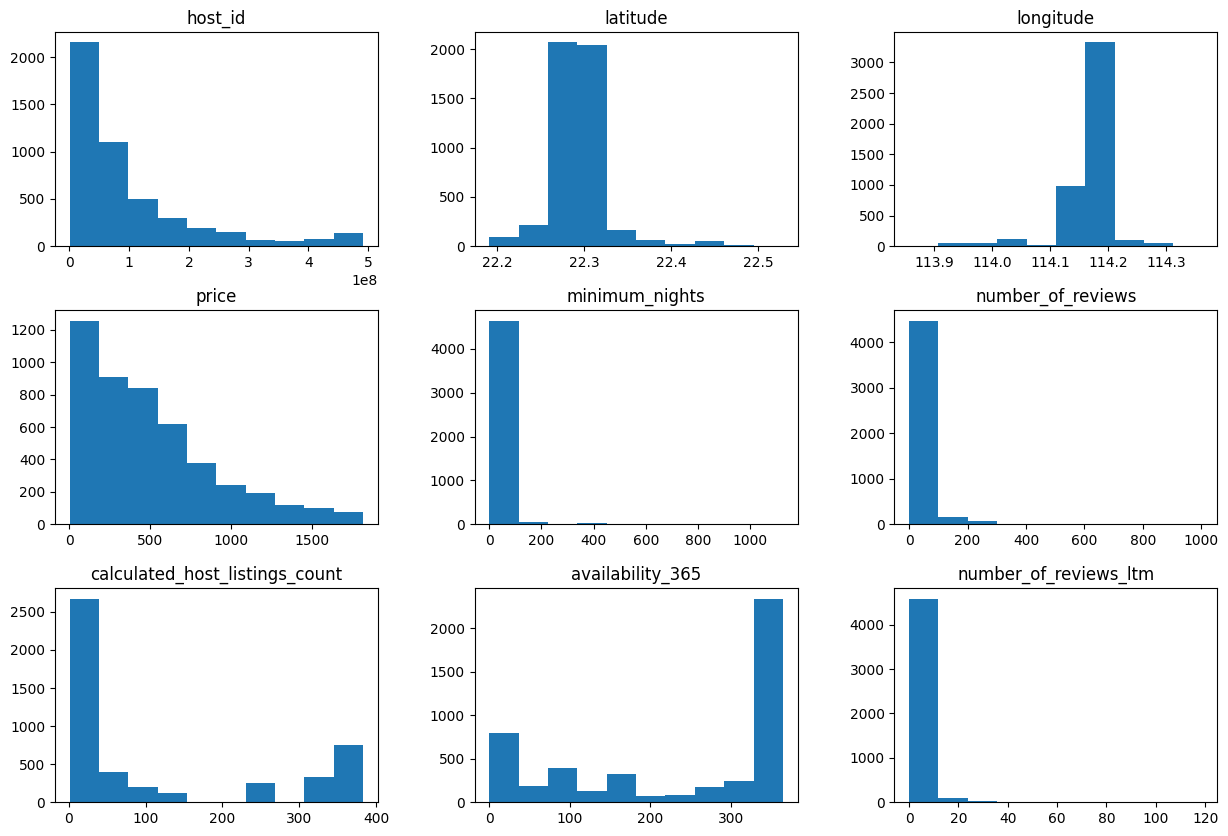

In [25]:
df_clean.hist(figsize=(15,10),grid=False);


# **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Para identificar as correlações existentes entre as variáveis serão apresentadas as seguintes informações:

1. Matriz de correlação; e
2. Heatmap (via biblioteca seaborn).

In [26]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.104490,0.108824,-0.538391,-0.258607,0.177871
minimum_nights,-0.104490,1.000000,-0.099098,0.134985,0.173150,-0.106918
number_of_reviews,0.108824,-0.099098,1.000000,-0.243788,-0.193800,0.453733
calculated_host_listings_count,-0.538391,0.134985,-0.243788,1.000000,0.493704,-0.170391
availability_365,-0.258607,0.173150,-0.193800,0.493704,1.000000,-0.132360
number_of_reviews_ltm,0.177871,-0.106918,0.453733,-0.170391,-0.132360,1.000000


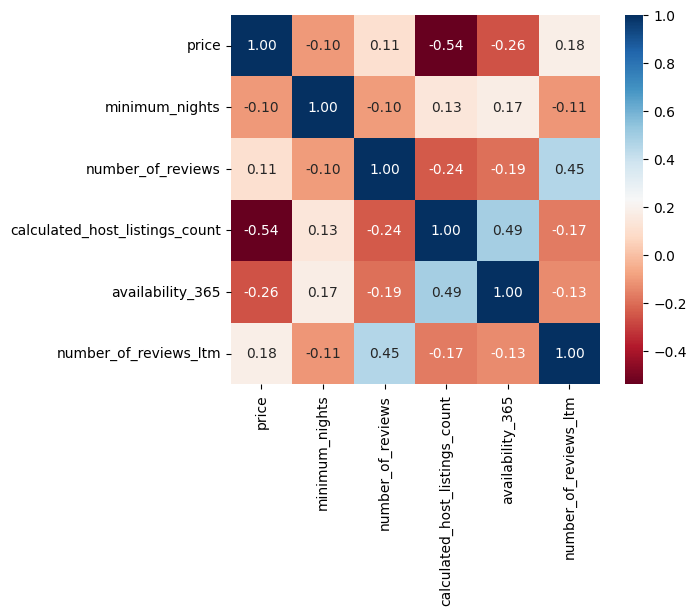

In [27]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Após a construção da matriz de correlação, poucas interações foram notadas, sendo necessário utilizar-se de outras ferramentas para prosseguir com as análises.

# **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos ou casas inteiras, apenas de um quarto ou mesmo dividir o quarto com outras pessoas.

A contagem da quantidade de ocorrências de cada tipo de aluguel, será realizada usando o método value_counts().


In [28]:
df_clean.room_type.value_counts()


Private room       2623
Entire home/apt    1755
Shared room         269
Hotel room           81
Name: room_type, dtype: int64

In [29]:
(df_clean.room_type.value_counts())*100 / df_clean.shape[0]

Private room       55.478003
Entire home/apt    37.119289
Shared room         5.689509
Hotel room          1.713198
Name: room_type, dtype: float64

A partir dos resultados acima, é possível verificar que o tipo de imóvel mais alugado é o quarto privativo, seguido de casa/apartamento completo. Abaixo segue uma apresentação visual onde observa-se na forma de diagrama:

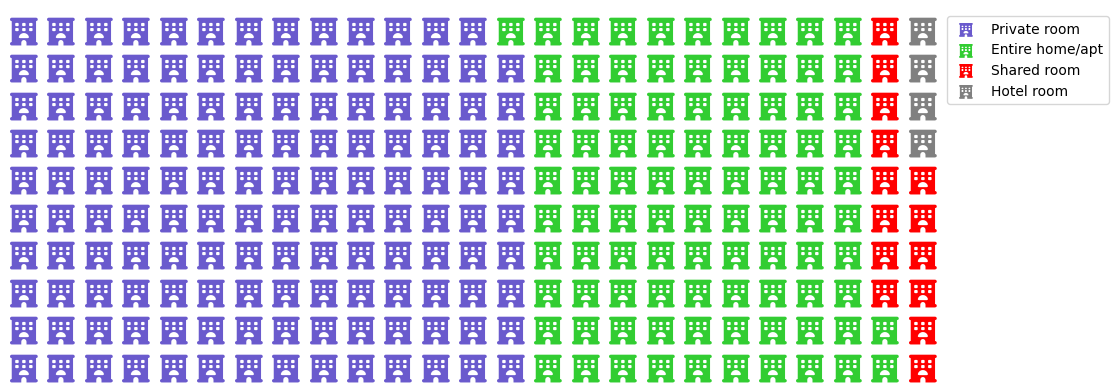

Private room       2623
Entire home/apt    1755
Shared room         269
Hotel room           81
Name: room_type, dtype: int64


In [30]:
roomTp = dict(df_clean.room_type.value_counts())

fig = plt.figure(FigureClass=Waffle,rows=10,columns=25,figsize=(12,10),colors=('slateblue', 'limegreen', 'red', 'grey'),values = roomTp,icons="hotel",icon_size=20,legend={"loc": "upper left", "bbox_to_anchor": (1,1)},
    icon_legend=True)
fig.set_tight_layout(False)
plt.show();
print(df_clean.room_type.value_counts())

# **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Dessa forma será feita a comparação dos bairros (*neighbourhoods*) a partir do preço de locação.

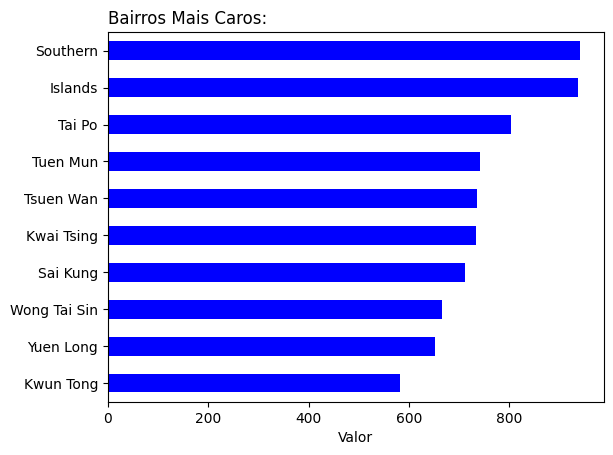

neighbourhood
Southern             940.885714
Islands              936.285141
Tai Po               802.347826
Tuen Mun             741.133333
Tsuen Wan            734.636364
Kwai Tsing           734.200000
Sai Kung             711.647059
Wong Tai Sin         665.833333
Yuen Long            651.372093
Kwun Tong            581.909091
Central & Western    566.112975
North                566.000000
Sha Tin              535.621622
Eastern              504.000000
Kowloon City         495.433862
Name: price, dtype: float64


In [31]:
df_clean.groupby("neighbourhood")['price'].mean().sort_values(ascending=True)[-10:].plot(kind='barh', color = 'blue')
plt.title('Bairros Mais Caros:', loc='left')
plt.xlabel('Valor')
plt.ylabel('')                                
plt.show()

print(df_clean.groupby("neighbourhood")['price'].mean().sort_values(ascending=False).head(15))

In [40]:
print(df_clean.groupby("neighbourhood")['price'].std().sort_values(ascending=False).head(15))

neighbourhood
Kwai Tsing           569.195221
Wong Tai Sin         541.314850
Tuen Mun             486.075959
Sai Kung             437.414820
Southern             436.048889
North                434.928894
Kowloon City         427.126199
Central & Western    426.830352
Tsuen Wan            417.177246
Kwun Tong            414.238476
Eastern              409.135765
Tai Po               404.939794
Sham Shui Po         390.107472
Islands              385.635278
Wan Chai             363.574401
Name: price, dtype: float64


De forma complementar a verificação da média e desvio padrão para os dados apresentados, é oportuno realizar a verificação do número de entradas por localidade, e evidenciar distorções entre as localidades. Tomando por referência as cinco localidades mais caras temos os seguintes dados:

In [35]:
"Southern"
print(df_clean[df_clean.neighbourhood == "Southern"].shape)


(35, 13)


In [36]:
"Islands"
print(df_clean[df_clean.neighbourhood == "Islands"].shape)


(249, 13)


In [37]:
"Tai Po"
print(df_clean[df_clean.neighbourhood == "Tai Po"].shape)


(23, 13)


In [39]:
"Tuen Mun"
print(df_clean[df_clean.neighbourhood == "Tuen Mun"].shape)


(15, 13)


In [41]:
"Kwai Tsing"
print(df_clean[df_clean.neighbourhood == "Kwai Tsing"].shape)


(5, 13)


Com os dados para as cinco localidades mais caras, confirma-se a suspeita de distorções entre os dados. Após a limpeza dos outliers da variavel "price" ainda deve observar os dados por localidade com critério. 

 1. A localidade "Southern" é a mais cara de todas, mas possui apenas 35 de 4728 entradas, e o quinto desvio padrão mais alto;
 2. A localidade "Islands", segundo lugar em "price" possui um volume significativo de entradas em relação ao dataset (249 de 4728 entradas), com um desvio padrão baixo entre as demais localidades, o nono entre as dez localidades avaliadas;
 3. A localidade "Tai Po", terceiro lugar em "price", possui apenas 23 de 4728 entradas, com um desvio padrão também baixo, o sétimo entre as dez avaliadas;
 4. A localidade "Tuen Mun", quarto lugar em "price", possui apenas 15 de 4728 entradas, e possui o terceiro desvio padrão mais alto entre as dez localidades avaliadas; e 
 5. A localidade de "Kwai Tsing" é o quinto lugar em "price", mas possui apenas 5 entradas, com desvio padrão mais alto de todas as localidades.
 


Após a análise realizada, para as cinco localidades mais caras, podemos ter boa confiabilidade com relação a variável "price" apenas para as localidades "Islands", segundo lugar, e "Tai Po", terceiro lugar.

As demais localidades entre as cinco mais caras deverão ser observadas com critério, caso a caso.

Uma outra possiblidade é verificar quais são as localidades que são mais alugadas, e realizar o cruzamento de dados com as cinco mais caras.

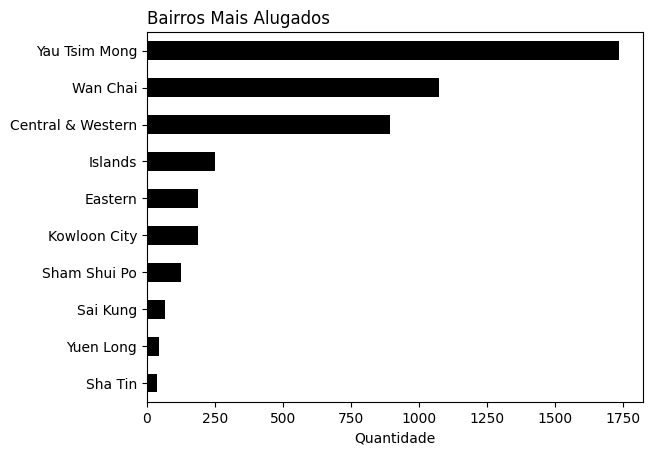

Yau Tsim Mong        1735
Wan Chai             1073
Central & Western     894
Islands               249
Eastern               189
Kowloon City          189
Sham Shui Po          126
Sai Kung               68
Yuen Long              43
Sha Tin                37
Southern               35
Tai Po                 23
Kwun Tong              22
Tuen Mun               15
Tsuen Wan              11
Name: neighbourhood, dtype: int64

In [42]:
df_clean.neighbourhood.value_counts().sort_values()[-10:].plot(kind = 'barh', color = 'black')
plt.title('Bairros Mais Alugados', loc='left')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

df_clean.neighbourhood.value_counts().head(15)


# **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O mínimo de noites para aluguel para o dataset são representados pela variável "minimum_nights". Observando-se o histograma obtido para a variável,é possível perceber que existem outliers presentes, e que deverão ser analisados.

Assim como para a variável "price", a presença de outliers torna as informações distorcidas, sendo necessário atuar no dataset para que as informações torne-se mais coerentes.

Identificando os outliers para a variável "minimum_nights":

In [50]:
q1_minimum_nights=df.minimum_nights.quantile(0.25)
q3_minimum_nights=df.minimum_nights.quantile(0.75)
IQR_minimum_nights=q3_minimum_nights-q1_minimum_nights
print('IQR da variável minimum_nights:', IQR_minimum_nights)

IQR da variável minimum_nights: 28.0


In [51]:
sup_minimum_nights=q3_minimum_nights+1.5*IQR_minimum_nights
inf_minimum_nights=q1_minimum_nights-1.5*IQR_minimum_nights
print('limite inferior de "minimum_nights":', inf_minimum_nights) 
print('limite superior de "minimum_nights":', sup_minimum_nights)

limite inferior de "minimum_nights": -41.0
limite superior de "minimum_nights": 71.0


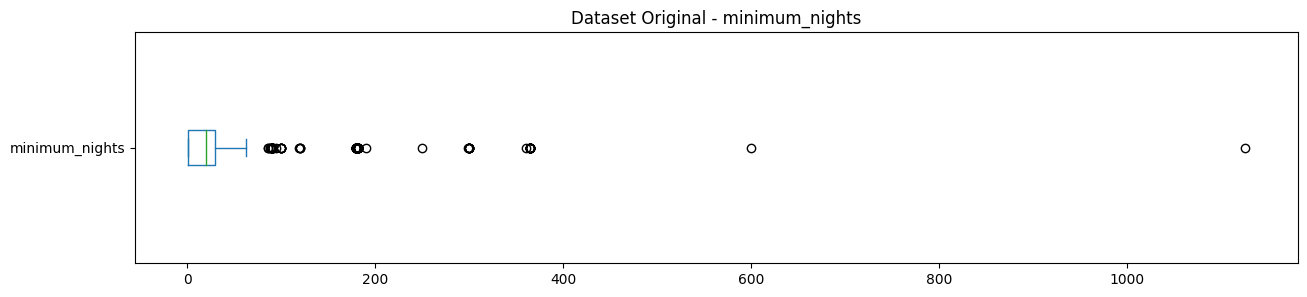

O dataset possui 5194 colunas
141 Entradas acima de 71
Representam 2.71% do dataset


In [53]:
fig,ax=plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 71".format(len(df[df.minimum_nights>71])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights>71])/df.shape[0])*100))

In [54]:
df_limpo=df.copy()
df_limpo.drop(df_limpo[df_limpo.minimum_nights>71].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights==0.0].index, axis=0 , inplace=True)
print('Shape antes da limpeza:', df.shape)
print('Shape após a limpeza:', df_limpo.shape)

Shape antes da limpeza: (5194, 13)
Shape após a limpeza: (5053, 13)


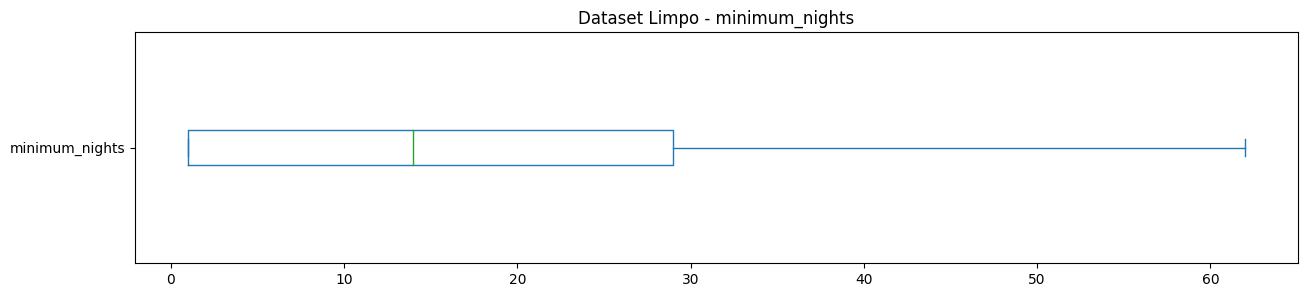

Tamanho Original:5194 colunas
Tamanho Limpo:5053 colunas


In [55]:
fig,ax=plt.subplots(figsize=(15,3))
df_limpo.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("Tamanho Original:{} colunas".format(df.shape[0]))
print("Tamanho Limpo:{} colunas".format(df_limpo.shape[0]))


In [56]:
df.describe().round(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0,5194.0
mean,99527082.8,22.3,114.2,1658.0,20.8,17.3,105.2,234.8,1.7
std,115094918.9,0.0,0.0,16447.8,38.4,48.5,144.7,145.0,6.9
min,63038.0,22.2,113.9,0.0,1.0,0.0,1.0,0.0,0.0
25%,12922210.8,22.3,114.2,185.2,1.0,0.0,3.0,87.0,0.0
50%,58862332.0,22.3,114.2,450.0,20.0,0.0,18.0,324.0,0.0
75%,138649185.0,22.3,114.2,850.0,29.0,8.0,255.0,364.0,1.0
max,491510217.0,22.5,114.4,500520.0,1125.0,1005.0,383.0,365.0,119.0


In [57]:
df_limpo.describe().round(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5053.0,5053.0,5053.0,5053.0,5053.0,5053.0,5053.0,5053.0,5053.0
mean,99189380.7,22.3,114.2,1649.7,16.1,17.1,107.8,234.4,1.7
std,115029275.9,0.0,0.0,16608.6,14.5,47.4,145.8,145.4,7.0
min,63038.0,22.2,113.9,0.0,1.0,0.0,1.0,0.0,0.0
25%,12471084.0,22.3,114.2,185.0,1.0,0.0,3.0,87.0,0.0
50%,58862332.0,22.3,114.2,450.0,14.0,0.0,21.0,324.0,0.0
75%,138649185.0,22.3,114.2,867.0,29.0,8.0,255.0,364.0,1.0
max,491510217.0,22.5,114.4,500520.0,62.0,1005.0,383.0,365.0,119.0


Assim como foi realizado para a variável "price", procedeu-se a limpeza dos outliers para a variável "minimum_nights". Como pode ser notado acima, com a retirada de menos de 3% de dados foi possível notar-se sensíveis mudanças nos dados estatísticos:

**Antes:**
média=20.8 / desvio padrão=38.4 / mediana=20.0 / máximo=1125.0

**Depois:**
média=16.1 / desvio padrão=14.5 / mediana=14.0 / máximo=62.0

Com a alteração realizada, é possível notar nas informações antes versus depois que a média e mediana ficaram com valores mais próximos, assim como o desvio padrão tornou-se menor, indicando que os dados agora estão de fato mais concentrados, podendo assim refletir uma análise de melhor qualidade.





#**Conclusões**

Com uma simples análise, limpeza e com uma versão simplificada de conjuntos de dados conseguimos extrair informações interessantes. O projeto realizado encontra-se no meu GitHub.

Pela análise técnica trabalhamos com importação, verificação, análise e a limpeza do dataset. Pela análise exploratória verificamos o resumo estatístico, os tipos de acomodação disponíveis, mínimo de noites para estadia, os 10 bairros mais alugados, e os 10 mais caros.
 
Observou-se visualmente em gráficos de barras e depois de maneira geral no mapa da cidade de Hong Kong. A ideia futura é expandir esse trabalho na versão mais complexa do dataset disponibilizado pelo Airbnbn com quase 25 mil linhas e 74 variáveis (colunas), aumentando a quantidade e qualidade das informações. Outra opção é expandir esse trabalho de análise para outras cidades ao redor do mundo.



# **Anexos**

Para ilustrar melhor os resultados obtidos, seguem em anexo mais dois tipos de mapas/diagramas, com informações sobre a variável "price", após a limpeza do dataset.

No primeiro diagrama tem-se a distribuição de preços por posição na cidade de Hong Kong, com uma escala em cores crescente de azul para vermelho:

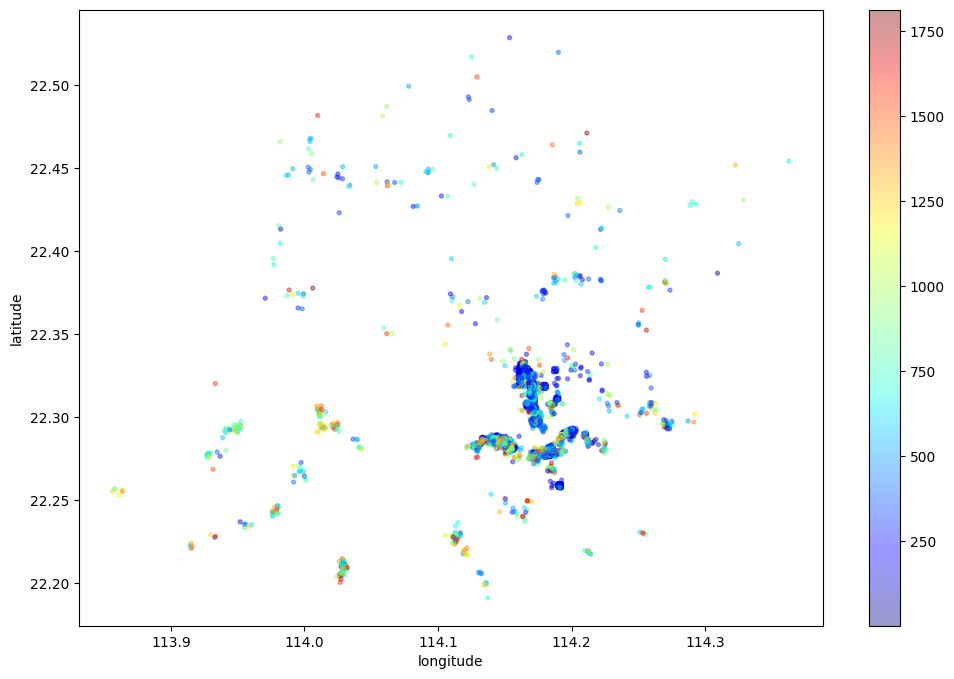

In [60]:
df_clean.plot(kind="scatter", 
              x="longitude", 
              y="latitude", 
              alpha=0.4, 
              c=df_clean["price"], 
              s=8, 
              cmap=plt.get_cmap("jet"), 
              figsize=(12,8));

Em complemento ao diagrama acima, segue logo a seguir mapa com o mesmo diagrama de variação da variável "price", por posição e variação da mesma.

In [58]:
px.density_mapbox(df_clean,
                  z = 'price',
                  lat = 'latitude', 
                  lon = 'longitude', 
                  radius = 1, 
                  zoom = 12,
                  width = 1000,
                  height = 500, 
                  mapbox_style = 'open-street-map')
     